In [1]:
# usual download function to get provided libraries
from os.path import basename, exists
def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)
    else:
        print(f"{filename} already exists")
        
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/survival.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")

thinkstats2.py already exists
thinkplot.py already exists
survival.py already exists
nsfg.py already exists


In [2]:
# import libaries I know I will want
import thinkplot
import thinkstats2
import survival
import pandas
import numpy

In [5]:
# download the data files that contain NSFG cycle 6 and 7 
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2006_2010_FemRespSetup.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2006_2010_FemResp.dat.gz")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dat.gz")

2006_2010_FemRespSetup.dct already exists
2006_2010_FemResp.dat.gz already exists
Downloaded 2002FemResp.dct
Downloaded 2002FemResp.dat.gz


In [6]:
# load dataframe with cycle 6 and 7 data
nsfgRespCycle6 = survival.ReadFemResp2002()
nsfgRespCycle7 = survival.ReadFemResp2010()

c:\Users\p3083416\OneDrive - Charter Communications\Documents\GitHub\DSC530-FinalProject\survival.py:636: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  resp.cmmarrhx.replace([9997, 9998, 9999], np.nan, inplace=True)
c:\Users\p3083416\OneDrive - Charter Communications\Documents\GitHub\DSC530-FinalProject\survival.py:636: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work beca

In [40]:
# test load
print(nsfgRespCycle6.head())
print(nsfgRespCycle7.head())


   caseid  cmbirth evrmarry  cmmarrhx  cmdivorcx  parity     finalwgt  \
0    2298      902    False       NaN        NaN       4  5556.717241   
1    5012      718     True     974.0     1077.0       1  4744.191350   
2   11586      708     True     910.0      938.0       1  4744.191350   
3    6794     1042    False       NaN        NaN       0  5923.977368   
4     616      991    False       NaN        NaN       0  7229.128072   

   cmintvw   agemarry        age  year  decade  fives  
0     1234        NaN  27.666667    75       7     15  
1     1233  21.333333  42.916667    59       5     11  
2     1234  16.833333  43.833333    58       5     11  
3     1234        NaN  16.000000    86       8     17  
4     1233        NaN  20.166667    82       8     16  
   caseid  cmbirth evrmarry  cmmarrhx  cmdivorcx  parity      wgtq1q16  \
0   34156      799    False       NaN        NaN       0   2571.376599   
1   40081      925     True    1314.0        NaN       0  11716.317848   
2  

In [58]:
# as we are looking into the survival and hazard function of marriages - only care about rows where the respondent was ever married
nsfgRespCycle6 = nsfgRespCycle6.astype({"evrmarry": str})
nsfgRespCycle7 = nsfgRespCycle7.astype({"evrmarry": str})
nsfgRespCycle6_married = nsfgRespCycle6[nsfgRespCycle6["evrmarry"] == "True"]
nsfgRespCycle7_married = nsfgRespCycle7[nsfgRespCycle7["evrmarry"] == "True"]
# add source field and merge datasets
nsfgRespCycle6_married["cycleSource"] = "Cycle6"
nsfgRespCycle7_married["cycleSource"] = "Cycle7"
allMarriedData = pandas.concat([nsfgRespCycle6_married, nsfgRespCycle7_married])
# clean up the data
allMarriedData.cmdivorcx.replace([9998, 9999], numpy.nan, inplace=True)


C:\Users\p3083416\AppData\Local\Temp\ipykernel_16964\3980449030.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nsfgRespCycle6_married["cycleSource"] = "Cycle6"
C:\Users\p3083416\AppData\Local\Temp\ipykernel_16964\3980449030.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nsfgRespCycle7_married["cycleSource"] = "Cycle7"
C:\Users\p3083416\AppData\Local\Temp\ipykernel_16964\3980449030.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using 

In [59]:
# check the results
print(allMarriedData)

       caseid  cmbirth evrmarry  cmmarrhx  cmdivorcx  parity      finalwgt  \
1        5012      718     True     974.0     1077.0       1   4744.191350   
2       11586      708     True     910.0      938.0       1   4744.191350   
5         845      727     True     937.0        NaN       6   4705.681352   
8        8656      780     True    1003.0        NaN       3   6520.021223   
10       5917      714     True     953.0        NaN       2   3488.586646   
...       ...      ...      ...       ...        ...     ...           ...   
12270   26745      812     True    1155.0        NaN       2   5220.893454   
12271   26914      985     True    1221.0        NaN       2   5152.498030   
12273   30517      810     True    1107.0        NaN       3   2830.681441   
12275   26372      771     True    1025.0        NaN       4  19328.779624   
12277   29718      977     True    1210.0        NaN       3   4876.196382   

       cmintvw   agemarry        age  year  decade  fives cycle

In [60]:
# cmdivorcx - contains date of 1st marrage divorce (if exists) in months since December 1899 (century months)
# cmmarrhx - date of 1st marrage in century months
# cmintvw - interview date in century months
# compute duration of marriages that ended in divorce and duration of marriages sof are for ongoing

allMarriedData["marriageLenth_Divorces"] = allMarriedData.cmdivorcx - allMarriedData.cmmarrhx
allMarriedData["marriageLenth_SoFar"] = allMarriedData.cmintvw - allMarriedData.cmmarrhx

#nsfgRespCycle6_married["marriageLenth_Divorces"] = nsfgRespCycle6_married.cmdivorcx - nsfgRespCycle6_married.cmmarrhx
#nsfgRespCycle6_married["marriageLenth_SoFar"] = nsfgRespCycle6_married.cmintvw - nsfgRespCycle6_married.cmmarrhx
#nsfgRespCycle7_married["marriageLenth_Divorces"] = nsfgRespCycle7_married.cmdivorcx - nsfgRespCycle7_married.cmmarrhx
#nsfgRespCycle7_married["marriageLenth_SoFar"] = nsfgRespCycle7_married.cmintvw - nsfgRespCycle7_married.cmmarrhx
# check results
#nsfgRespCycle6_married.head()

In [68]:
import math
# create column that combines 2 calcualted columns
allMarriedData['marriageLength_All'] = allMarriedData.apply(
    lambda row: 
        row['marriageLenth_SoFar'] if math.isnan(row['marriageLenth_Divorces']) 
        else row['marriageLenth_Divorces'], 
    axis=1)

# clean up - there are negative values in marriage length due to reported divorce being before the marriage
allMarriedData = allMarriedData[allMarriedData["marriageLength_All"] >= 0]


In [69]:
allMarriedData.marriageLength_All.describe()
print(allMarriedData.query('marriageLength_All < 0'))

Empty DataFrame
Columns: [caseid, cmbirth, evrmarry, cmmarrhx, cmdivorcx, parity, finalwgt, cmintvw, agemarry, age, year, decade, fives, cycleSource, wgtq1q16, marriageLenth_Divorces, marriageLenth_SoFar, marriageLength_All]
Index: []


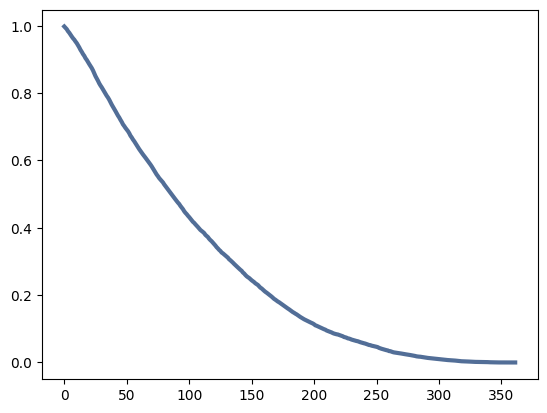

In [70]:
# plot survival curve from CDF for reference
cdf = thinkstats2.Cdf(allMarriedData.marriageLength_All, label="CDF")
sf = survival.MakeSurvivalFromCdf(cdf)
# plot survival curve
thinkplot.plot(sf)

In [ ]:
# estimate Hazard Function
